In [1]:
import pandas as pd
import sys; sys.path.insert(0, '..')
from stattest import Analysis
from clustering import ClusteringPipe

df = pd.read_csv('data_processed.csv')
country = pd.Categorical(df.country)
y = pd.DataFrame({'country':country.codes})
x_raw = df.drop(['session ID', 'year','country', 'day','price_avg' ], axis=1)

data = ClusteringPipe(x_raw, y)

## K-Means

### outlires removal

In [2]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

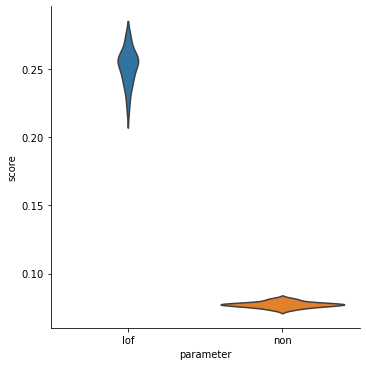

In [3]:
results.plot()

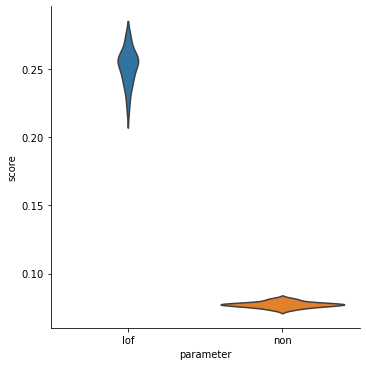

In [4]:
results.plot()

In [5]:
results.mean()

lof    0.251771
non    0.077372
dtype: float64

In [6]:
results.annova()

(5285.793141572883, 1.1282799002721135e-58)

### dimension reduction method

In [94]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=15, random_state=i) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap']})

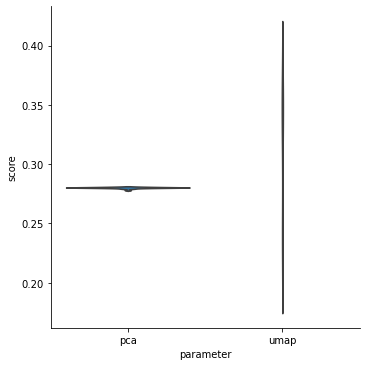

In [97]:
results.plot()

In [95]:
results.mean()

pca     0.280206
umap    0.312101
dtype: float64

In [96]:
results.annova()

(11.326701659856415, 0.001360214047092212)

### number of clusters

detect potentially good k values with the elbow mehtod:

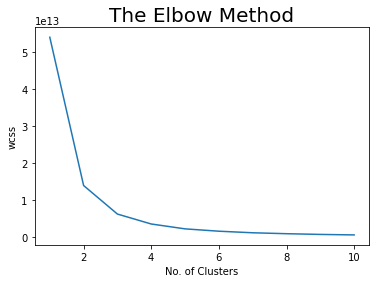

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_raw)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

now we will test which one is the best using the full process

In [119]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=5) \
                    .remove_outlires('lof') \
                    .cluster('kmeans', n_clusters=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [2,4,5,6]})

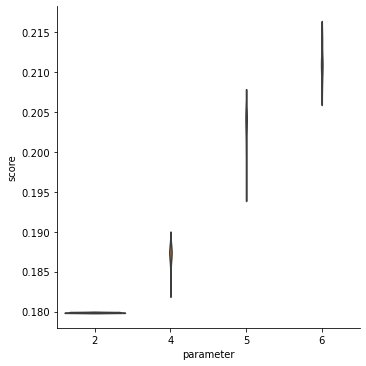

In [120]:
results.plot()

In [121]:
results.mean()

2    0.179885
4    0.186882
5    0.202992
6    0.211312
dtype: float64

In [122]:
results.annova()

(2451.746105054205, 1.0361300063046581e-104)

In [123]:
results.scheffe()

,2,4,5,6
2,1.000000e+00,2.502787e-31,7.597811e-84,6.395645e-99
4,2.502787e-31,1.000000e+00,1.305468e-66,1.485058e-86
5,7.597811e-84,1.305468e-66,1.000000e+00,7.991145e-38
6,6.395645e-99,1.485058e-86,7.991145e-38,1.000000e+00


### visualize cluster

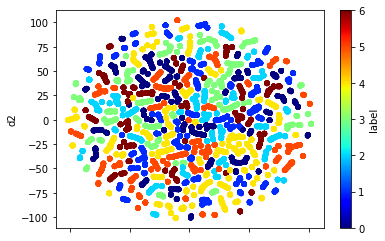

In [15]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .remove_outlires('lof') \
    .cluster('kmeans', n_clusters=7) \
    .visualize('tsne')

### corelationg with target class

In [16]:
data.normalize('std') \
    .reduce('umap', n_components=5).data().shape

(24026, 5)

## GMM

### outlires removal

In [128]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('pca', n_components=30) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

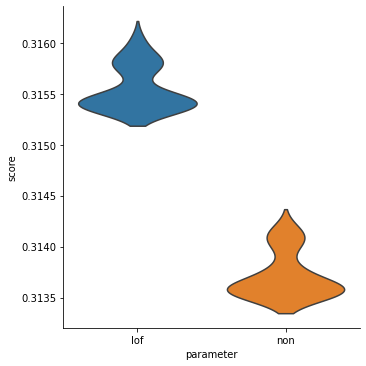

In [129]:
results.plot()

In [130]:
results.mean()

lof    0.315551
non    0.313716
dtype: float64

In [131]:
results.annova()

(1075.7110967823946, 3.874453265499089e-39)

### Dimension Reduction Method

In [21]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce(p, n_components=30, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

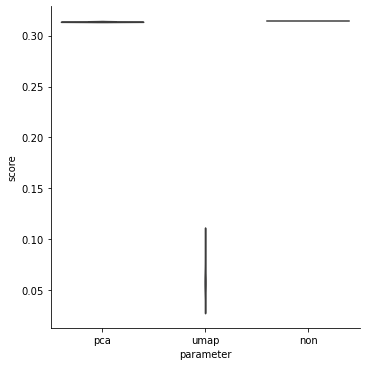

In [22]:
results.plot()

### Number of dimensions

In [124]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('pca', n_components=p, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,20,30]})

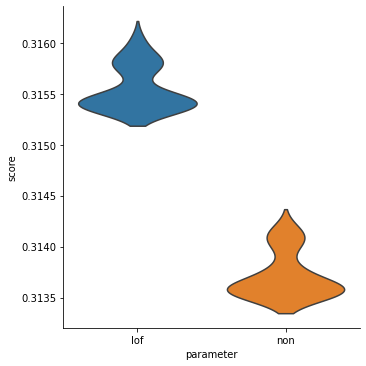

In [132]:
results.plot()

In [126]:
results.mean()

5     0.336934
10    0.289174
20    0.312251
30    0.313717
dtype: float64

In [127]:
results.annova()

(345.6705512168331, 1.16561736994029e-57)

In [133]:
results.scheffe()

,lof,non
lof,1.000000e+00,3.874453e-39
non,3.874453e-39,1.000000e+00


### Coveriance Type

In [28]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=5) \
                    .cluster('gmm', n_components=6, covariance_type=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['spherical', 'tied', 'diag', 'full']
})

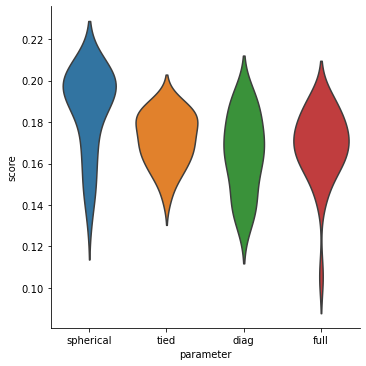

In [29]:
results.plot()

In [30]:
results.mean()

spherical    0.185933
tied         0.171756
diag         0.164774
full         0.168651
dtype: float64

In [31]:
results.annova()

(8.268366188704087, 4.953545497486398e-05)

In [32]:
results.scheffe()

,spherical,tied,diag,full
spherical,1.000000,0.024207,0.000168,0.003289
tied,0.024207,1.000000,0.502101,0.925520
diag,0.000168,0.502101,1.000000,0.865871
full,0.003289,0.925520,0.865871,1.000000


### number of clusters

detect potentially good k values with the elbow mehtod:

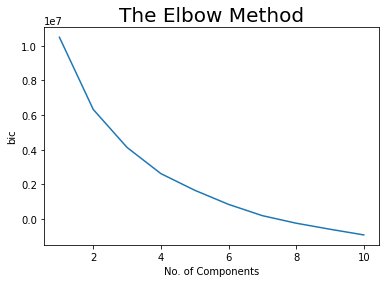

In [33]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(x_raw)
    bic.append(gmm.bic(x_raw))
    
plt.plot(range(1, 11), bic)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Components')
plt.ylabel('bic')
plt.show()

now we will test which one is the best using the full process

In [34]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=30) \
                    .cluster('gmm', n_components=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [3,4,5,6,7,8]})

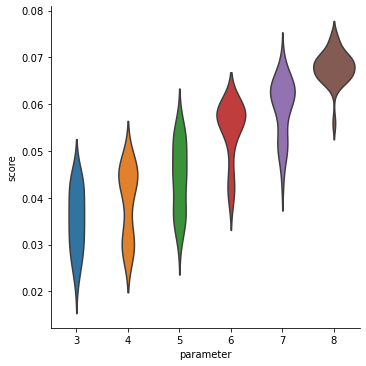

In [35]:
results.plot()

In [36]:
results.mean()

3    0.035295
4    0.039144
5    0.044196
6    0.054442
7    0.059285
8    0.067916
dtype: float64

In [37]:
results.annova()

(114.37757931379556, 4.259148136176346e-53)

In [38]:
results.scheffe()

,3,4,5,6,7,8
3,1.000000e+00,3.809030e-01,6.759973e-05,8.659590e-20,6.071374e-28,3.981026e-42
4,3.809030e-01,1.000000e+00,1.080870e-01,1.467128e-13,1.890866e-21,6.382326e-36
5,6.759973e-05,1.080870e-01,1.000000e+00,1.913370e-06,3.093253e-13,1.729914e-27
6,8.659590e-20,1.467128e-13,1.913370e-06,1.000000e+00,1.399165e-01,8.408070e-11
7,6.071374e-28,1.890866e-21,3.093253e-13,1.399165e-01,1.000000e+00,1.307881e-04
8,3.981026e-42,6.382326e-36,1.729914e-27,8.408070e-11,1.307881e-04,1.000000e+00


### Cluster visualisation 

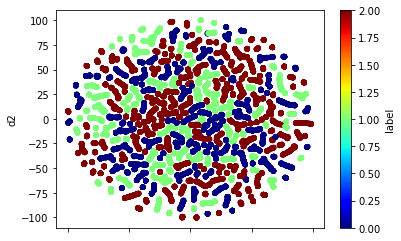

In [39]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=3) \
    .visualize('tsne')

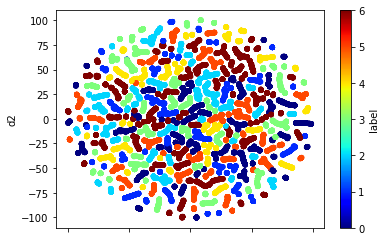

In [40]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=7) \
    .visualize('tsne')

### corelationg with target class

In [41]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=2) \
    .score('v', label='country')

0.002223741744773787

## Louvaine

### outlires removal

In [42]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

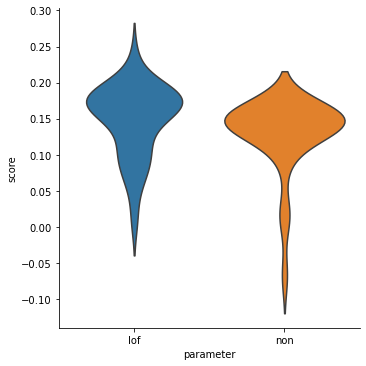

In [43]:
results.plot()

In [44]:
results.mean()

lof    0.148438
non    0.128692
dtype: float64

In [45]:
results.annova()

(2.3163797454188995, 0.13345141640900587)

### Dimension Reduction Method

In [46]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=10, random_state=i) \
                    .cluster('louvain') \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

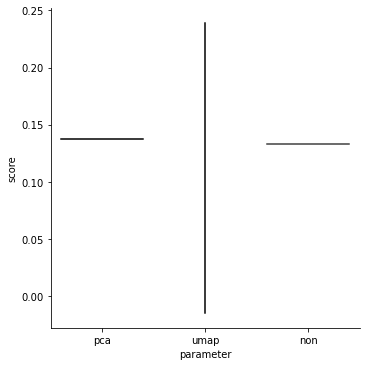

In [47]:
results.plot()

### Number of dimensions

In [48]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,15, 20]})

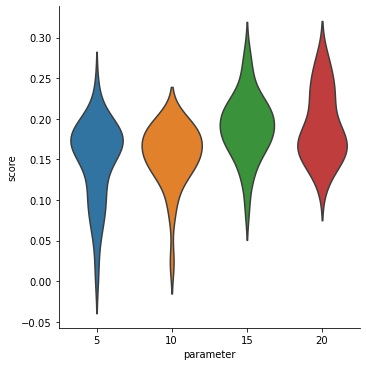

In [49]:
results.plot()

In [50]:
results.mean()

5     0.148438
10    0.154744
15    0.190366
20    0.190372
dtype: float64

In [51]:
results.annova()

(8.43865889171559, 4.045916657675808e-05)

In [52]:
results.scheffe()

,5,10,15,20
5,1.000000,0.954034,0.003169,0.003163
10,0.954034,1.000000,0.017468,0.017440
15,0.003169,0.017468,1.000000,1.000000
20,0.003163,0.017440,1.000000,1.000000


### Modularity Type

In [53]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('louvain', modularity=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['dugue', 'newman', 'potts']
})

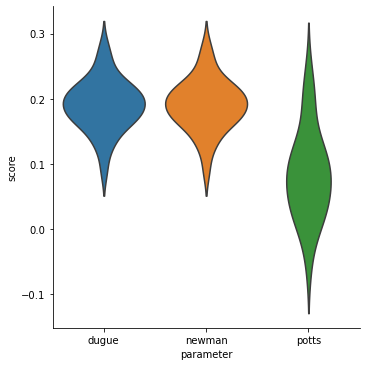

In [54]:
results.plot()

In [55]:
results.mean()

dugue     0.190366
newman    0.190366
potts     0.083746
dtype: float64

In [56]:
results.annova()

(42.77361612113818, 1.1576828622851126e-13)

### Cluster visualisation 

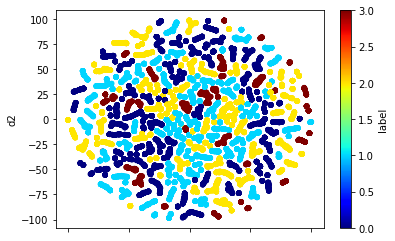

In [57]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='newman') \
    .visualize('tsne')

### corelationg with target class

In [58]:
data.normalize('std') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='newman') \
    .score('v', label='country')

0.00372649883307368

## Prim

### outlires removal

In [59]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('prim', cutoff_scale=0.8) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

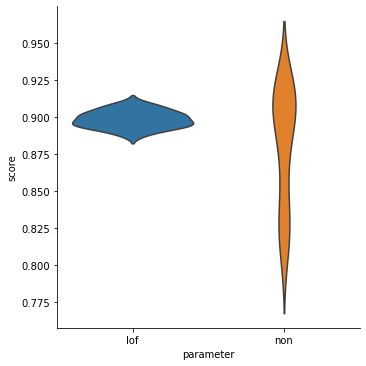

In [60]:
results.plot()

In [61]:
results.mean()

lof    0.898687
non    0.880655
dtype: float64

In [62]:
results.annova()

(6.109543055593361, 0.01640185591617792)

### Dimension Reduction Method

In [63]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=40, random_state=i) \
                    .cluster('prim', cutoff_scale=2) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

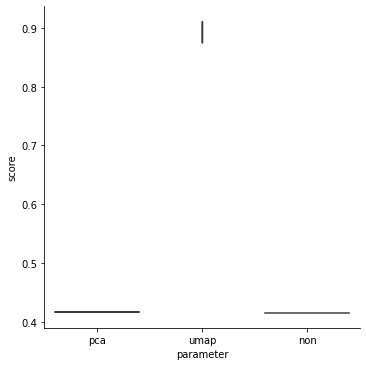

In [64]:
results.plot()

### Number of dimensions

In [65]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('prim', cutoff_scale=2) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5, 10, 15, 20, 30, 40]})

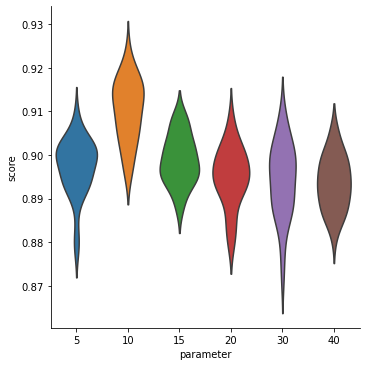

In [66]:
results.plot()

In [67]:
results.mean()

5     0.897314
10    0.910242
15    0.898942
20    0.895046
30    0.894287
40    0.893680
dtype: float64

In [68]:
results.annova()

(24.339820697815924, 1.5522477486288096e-18)

In [69]:
results.scheffe()

,5,10,15,20,30,40
5,1.000000e+00,6.772092e-09,9.740444e-01,8.968223e-01,7.147113e-01,5.250815e-01
10,6.772092e-09,1.000000e+00,6.923714e-07,5.698134e-12,4.674434e-13,6.091004e-14
15,9.740444e-01,6.923714e-07,1.000000e+00,4.425196e-01,2.364450e-01,1.245453e-01
20,8.968223e-01,5.698134e-12,4.425196e-01,1.000000e+00,9.992758e-01,9.882105e-01
30,7.147113e-01,4.674434e-13,2.364450e-01,9.992758e-01,1.000000e+00,9.997575e-01
40,5.250815e-01,6.091004e-14,1.245453e-01,9.882105e-01,9.997575e-01,1.000000e+00


### Cutoff Scale

In [76]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=10, random_state=i) \
                    .cluster('prim', cutoff_scale=p) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [0.6, 0.7, 0.8, 0.9]
})

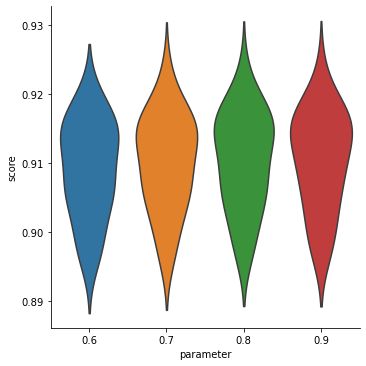

In [77]:
results.plot()

In [78]:
results.mean()

0.6    0.909093
0.7    0.910063
0.8    0.910326
0.9    0.910344
dtype: float64

In [79]:
results.annova()

(0.20922920076927357, 0.8898358279047169)

### Cluster visualisation 

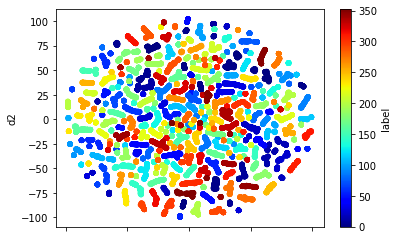

In [80]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=10) \
    .cluster('prim', cutoff_scale=0.8) \
    .visualize('tsne')

### corelationg with target class

In [83]:
data.normalize('std') \
    .reduce('umap', n_components=10) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='country')

0.02834679328048314

## DBSCAN

### outlires removal

In [84]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30, random_state=i) \
                    .cluster('dbscan', eps=0.5, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

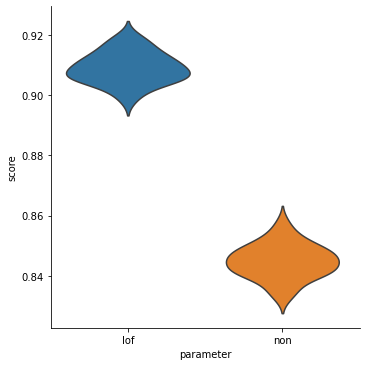

In [85]:
results.plot()

In [86]:
results.mean()

lof    0.909089
non    0.844832
dtype: float64

In [87]:
results.annova()

(2147.2284385100065, 1.596630508998504e-47)

### Number of dimensions

In [88]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('dbscan', eps=0.5, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5, 10, 20, 30, 40]})

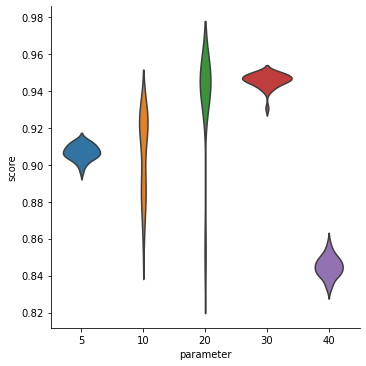

In [89]:
results.plot()

In [90]:
results.mean()

5     0.906799
10    0.906394
20    0.936028
30    0.945728
40    0.844832
dtype: float64

In [91]:
results.annova()

(174.43858671297113, 2.351649676444316e-54)

In [92]:
results.scheffe()

,5,10,20,30,40
5,1.000000e+00,9.999892e-01,1.854634e-08,7.703555e-14,8.516035e-28
10,9.999892e-01,1.000000e+00,1.144294e-08,4.456124e-14,1.495259e-27
20,1.854634e-08,1.144294e-08,1.000000e+00,2.641438e-01,2.357143e-44
30,7.703555e-14,4.456124e-14,2.641438e-01,1.000000e+00,2.629905e-49
40,8.516035e-28,1.495259e-27,2.357143e-44,2.629905e-49,1.000000e+00


### Epsilon and Min samples

In [98]:
import itertools
results = Analysis({f'{eps}_{mins}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=30, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=mins) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps, mins in itertools.product([0.25,0.5,0.75], [4,5,6])
})

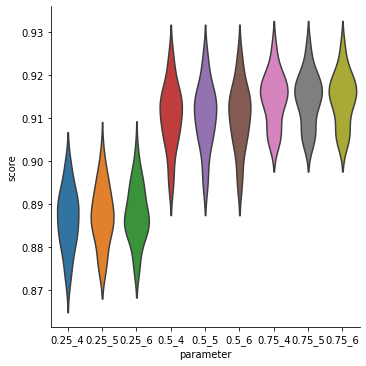

In [99]:
results.plot()

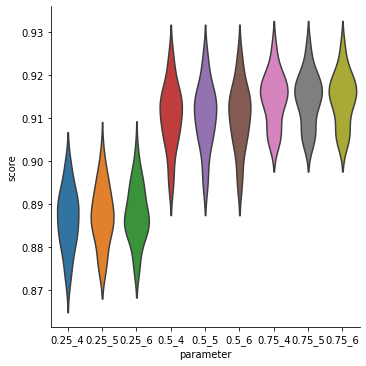

In [100]:
results.plot()

In [101]:
results.mean()

0.25_4    0.886575
0.25_5    0.887414
0.25_6    0.887730
0.5_4     0.910516
0.5_5     0.910516
0.5_6     0.910463
0.75_4    0.914530
0.75_5    0.914530
0.75_6    0.914530
dtype: float64

In [102]:
results.annova()

(103.54368851941494, 1.8030068216521035e-76)

In [103]:
results.scheffe()

,0.25_4,0.25_5,0.25_6,0.5_4,0.5_5,0.5_6,0.75_4,0.75_5,0.75_6
0.25_4,1.000000e+00,9.999938e-01,9.999257e-01,2.695378e-26,2.695378e-26,3.393096e-26,5.713785e-34,5.713785e-34,5.713785e-34
0.25_5,9.999938e-01,1.000000e+00,1.000000e+00,1.008158e-24,1.008158e-24,1.266382e-24,2.366888e-32,2.366888e-32,2.366888e-32
0.25_6,9.999257e-01,1.000000e+00,1.000000e+00,3.917458e-24,3.917458e-24,4.916346e-24,9.619226e-32,9.619226e-32,9.619226e-32
0.5_4,2.695378e-26,1.008158e-24,3.917458e-24,1.000000e+00,1.000000e+00,1.000000e+00,7.435286e-01,7.435286e-01,7.435286e-01
0.5_5,2.695378e-26,1.008158e-24,3.917458e-24,1.000000e+00,1.000000e+00,1.000000e+00,7.435286e-01,7.435286e-01,7.435286e-01
0.5_6,3.393096e-26,1.266382e-24,4.916346e-24,1.000000e+00,1.000000e+00,1.000000e+00,7.288173e-01,7.288173e-01,7.288173e-01
0.75_4,5.713785e-34,2.366888e-32,9.619226e-32,7.435286e-01,7.435286e-01,7.288173e-01,1.000000e+00,1.000000e+00,1.000000e+00
0.75_5,5.713785e-34,2.366888e-32,9.619226e-32,7.435286e-01,7.435286e-01,7.288173e-01,1.000000e+00,1.000000e+00,1.000000e+00
0.75_6,5.713785e-34,2.366888e-32,9.619226e-32,7.435286e-01,7.435286e-01,7.288173e-01,1.000000e+00,1.000000e+00,1.000000e+00


### Epsilon

In [104]:
import itertools
results = Analysis({f'{eps}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=30, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps in [0.25,0.5, 0.75, 0.9] \
})

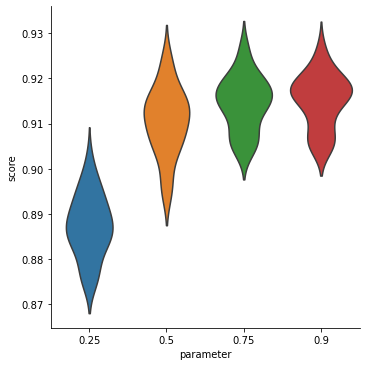

In [105]:
results.plot()

In [106]:
results.mean()

0.25    0.887414
0.5     0.910516
0.75    0.914530
0.9     0.915105
dtype: float64

In [107]:
results.annova()

(116.95970885275317, 6.321993745614674e-35)

In [108]:
results.scheffe()

,0.25,0.5,0.75,0.9
0.25,1.000000e+00,1.514726e-23,9.775195e-29,1.846465e-29
0.5,1.514726e-23,1.000000e+00,1.477969e-01,7.356869e-02
0.75,9.775195e-29,1.477969e-01,1.000000e+00,9.902876e-01
0.9,1.846465e-29,7.356869e-02,9.902876e-01,1.000000e+00


### Min Samples

In [109]:
import itertools
results = Analysis({f'{m}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=30, random_state=i) \
                    .cluster('dbscan', eps=0.75, min_samples=m) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for m in [4,5,6,7,11] \
})

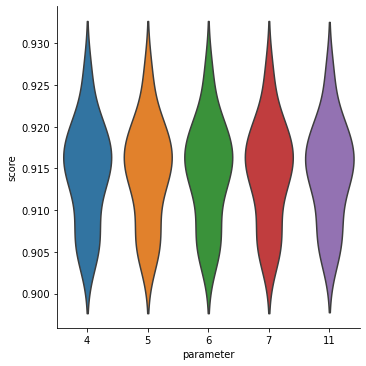

In [110]:
results.plot()

In [111]:
results.mean()

4     0.914530
5     0.914530
6     0.914530
7     0.914530
11    0.914545
dtype: float64

In [112]:
results.annova()

(3.8398869810784536e-05, 0.9999999970105358)

In [113]:
results.scheffe()

,4,5,6,7,11
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0
11,1.0,1.0,1.0,1.0,1.0


### Cluster visualisation 

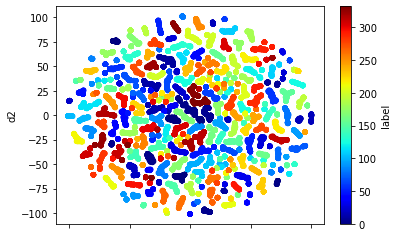

In [114]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=30) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .visualize('tsne')

### corelationg with target class

In [115]:
data.normalize('std') \
    .reduce('umap', n_components=30) \
    .cluster('louvain', modularity='newman') \
    .score('v', label='country')

0.14495802604008368

## Cross methods

In [134]:
results = Analysis({
   'dbscan':[data.normalize('std') \
                  .remove_outlires('lof') \
                  .reduce('umap', n_components=10, random_state=i) \
                  .cluster('dbscan', eps=0.75, min_samples=5) \
                  .score('silhouette').mean() for i in range(30)], \
    'prim': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=40, random_state=i) \
                 .cluster('prim', cutoff_scale=0.8) \
                 .score('silhouette').mean() for i in range(30)], \
    'louvain': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=15, random_state=i) \
                 .cluster('louvain', modularity='newman') \
                 .score('silhouette').mean() for i in range(30)], \
    'gmm': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('gmm', n_components=7) \
                 .score('silhouette').mean() for i in range(30)], \
    'kmeans': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('kmeans', n_clusters=7) \
                 .score('silhouette').mean() for i in range(30)], \
               
})

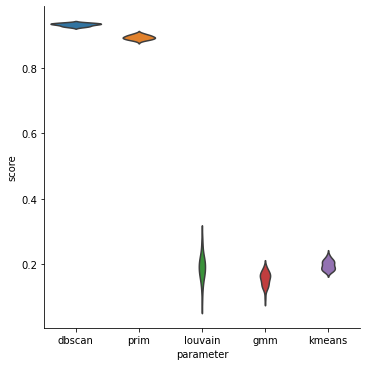

In [135]:
results.plot()

In [136]:
results.mean()

dbscan     0.932709
prim       0.893930
louvain    0.190366
gmm        0.156062
kmeans     0.198502
dtype: float64

In [137]:
results.annova()

(10514.333492103273, 1.6869377988591958e-177)

In [138]:
results.scheffe()

,dbscan,prim,louvain,gmm,kmeans
dbscan,1.000000e+00,1.274621e-08,6.623308e-151,9.962579e-154,3.231430e-150
prim,1.274621e-08,1.000000e+00,1.481895e-147,1.580261e-150,7.881697e-147
louvain,6.623308e-151,1.481895e-147,1.000000e+00,6.448327e-07,7.064034e-01
gmm,9.962579e-154,1.580261e-150,6.448327e-07,1.000000e+00,4.198841e-10
kmeans,3.231430e-150,7.881697e-147,7.064034e-01,4.198841e-10,1.000000e+00
